#### Necessary Imports & Installs

In [18]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Function to be differentiated: $f(x)=3x^2 - 4x + 5$ 

In [22]:
def f(x):
  return 3*x**2 - 4*x +5

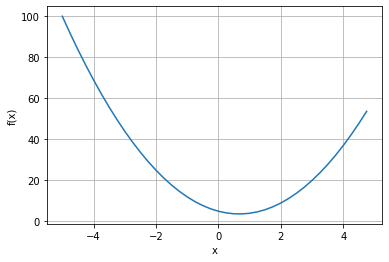

In [20]:
# Plotting the function
x = np.arange(-5, 5, 0.25)
y = f(x)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

The continous function _f(x)_ is said to be differentiable at point _a_ if the derivitive as defined below exists.

$\lim_{h \to 0} \frac{f(a+h) - f(a)}{h}$


In [21]:
h = 0.00000001

# Taking the derivitive at a = 3
a = 3.0
df_da = (f(a+h)-f(a))/h
print(f"The derivitive at {a} is {df_da}")

# Taking the derivitive at a = -3
a = -3.0
df_da = (f(a+h)-f(a))/h
print(f"The derivitive at {a} is {df_da}")

# Taking the derivitive at a = 2/3
a = 2/3
df_da = (f(a+h)-f(a))/h
print(f"The derivitive at {a} is {df_da}")

The derivitive at 3.0 is 14.00000009255109
The derivitive at -3.0 is -22.00000039920269
The derivitive at 0.6666666666666666 is 0.0


Switching a multi-variable function: $f(a,b,c) = a * b + c$ 

In [31]:
def f(a=2.0, b=-3.0, c=10.0):
  return a*b + c

d1 = f()
h = 0.00000001

# Taking the derivitive with respect to a
d2 = f(a=2.0+h)
dd_da = (d2-d1) / h
print(f"The derivitive at 'a' is {dd_da}")

# Taking the derivitive with respect to b
d2 = f(b=-3.0+h)
dd_db = (d2-d1) / h
print(f"The derivitive at 'b' is {dd_db}")

# Taking the derivitive with respect to c
d2 = f(c=10.0+h)
dd_dc = (d2-d1) / h
print(f"The derivitive at 'c' is {dd_dc}")

The derivitive at 'a' is -2.999999981767587
The derivitive at 'b' is 1.999999987845058
The derivitive at 'c' is 1.000000082740371
